In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Heart%20Attack%20Analysis%20%26%20Prediction%20Dataset/heart.csv")

In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

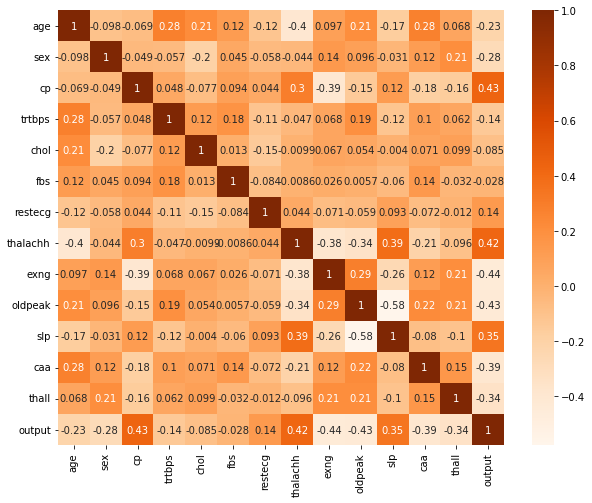

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="Oranges",ax=ax)

<AxesSubplot:xlabel='output', ylabel='count'>

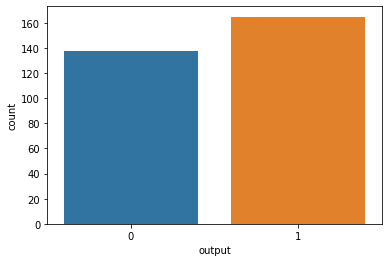

In [6]:
sns.countplot(data["output"])

<AxesSubplot:xlabel='sex', ylabel='count'>

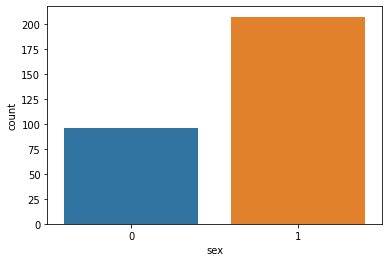

In [7]:
sns.countplot(data["sex"])

<AxesSubplot:>

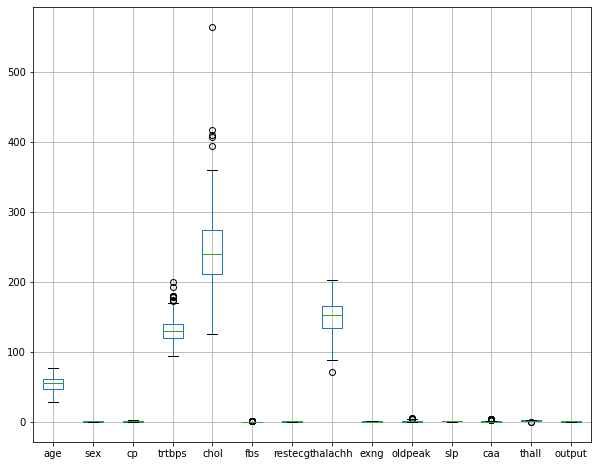

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
data.boxplot(ax=ax)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
var_col = ["age","trtbps","chol","thalachh","oldpeak"]
data1 = pd.get_dummies(data,columns=['sex',"cp","fbs","restecg","exng","slp","thall"],drop_first=True )

scale = StandardScaler()
data1[var_col] = scale.fit_transform(data1[var_col])
X = data1.drop("output",axis = 1)
y = data1[["output"]]
X.head()

,age,trtbps,chol,thalachh,oldpeak,caa,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1001)
params_ada = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
ada= AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adaGSCV = GridSearchCV(ada, param_grid=params_ada,verbose=3,scoring='f1',n_jobs=-1)
bagc = BaggingClassifier(base_estimator=DecisionTreeClassifier())

params_bagc = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000]}
bagcGSCV=  GridSearchCV(bagc, param_grid=params_bagc,verbose=3,scoring='f1',n_jobs=-1)            
model_list1 = [("ada",adaGSCV),("bagging",bagcGSCV)]
for modelname, model in model_list1:
  model.fit(X_train,y_train)
  model.predict(X_test)
  best_para = model.best_params_
  score_m = model.score(X_test,y_test)
  print(modelname, ":", score_m)
  print(modelname, ":", best_para)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.679 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=0.679 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=250;, score=0.836 total time=   0.8s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=1000;, score=0.857 total time=   3.0s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, score=0.784 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, sc

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.815 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=0.821 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=250;, score=0.842 total time=   0.8s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=1000;, score=0.766 total time=   3.0s
[CV 5/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=1000;, score=0.846 total time=   3.0s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=1000;, score=0.704 total time=   3.3s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.725 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=0.807 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=0.816 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=250;, score=0.750 total time=   0.8s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=1000;, score=0.821 total time=   3.0s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, score=0.836 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, s

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

ada : 0.8181818181818182
ada : {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.01, 'n_estimators': 250}
Fitting 5 folds for each of 40 candidates, totalling 200 fits

[CV 2/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=250;, score=0.786 total time=   0.8s
[CV 5/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=250;, score=0.816 total time=   0.8s
[CV 3/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=1000;, score=0.807 total time=   3.3s
[CV 3/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.851 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=8, base_est

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 4/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=1000;, score=0.741 total time=   3.5s
[CV 3/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=50;, score=0.847 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=250;, score=0.816 total time=   0.9s
[CV 4/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=250;, score=0.786 total time=   0.9s
[CV 2/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=1000;, score=0.800 total time=   3.7s
[CV 1/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=10;, score=0.745 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=10

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 4/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=10;, score=0.679 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.698 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.852 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.880 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=250;, score=0.800 total time=   0.8s
[CV 5/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=250;, score=0.792 total time=   0.8s
[CV 3/5] END base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimato

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 


[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, n_estimators=250;, score=0.807 total time=   0.9s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, n_estimators=250;, score=0.704 total time=   0.9s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=10;, score=0.778 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=10;, score=0.742 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=10;, score=0.836 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=10;, score=0.727 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=10;, score=0.809 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=10, n_estimators=50;, score=